# ResNet(Residual Network) 모델을 이용한 이미지 분류 실습
- VGG16에 비해 상품성이 좋다. 그래서 지금까지도 쓰이는 모델.

In [24]:
# 모델 소개

'''

VGG 처럼 계속 변형되고 컨볼루션 하는게 아니라

처리된 결과값을 또 더하고 컨볼루션 처리된걸 또 더하고 또 더하고..

계속 데이터 흐름을 보강하는 것.

육수가 옅어지는걸 자꾸 진국을 넣어서 농도를 유지해줌.

마치 LSTM의 논리도 비슷.

Residual Connection 잔차 연결.

'''

'\n\nVGG 처럼 계속 변형되고 컨볼루션 하는게 아니라\n\n처리된 결과값을 또 더하고 컨볼루션 처리된걸 또 더하고 또 더하고..\n\n계속 데이터 흐름을 보강하는 것.\n\n육수가 옅어지는걸 자꾸 진국을 넣어서 농도를 유지해줌.\n\n마치 LSTM의 논리도 비슷.\n\nResidual Connection 잔차 연결.\n\n'

## ReLu 통과 후 결과 확인

In [25]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import numpy as np

# ReLu 생성
layer = tf.keras.layers.ReLU() #Rectified Linear Unit activation function.

# 데이터 입력
output=layer([-3.0, -1.0, 0.0, 2.0])

# 결과 확인

print(output)

print('*'*80)

# output + x
x= tf.constant([-3.0, -1.0, 0.0, 2.0])
result = output + x

print(result)

# 입력과 출력의 차이 = 잔차

# VGG16 = COnv2D 13 + Dense 3 = 16

# ResNet은 가중치가 156개...천천히 학습시켜야 지속적으로 오래.. 그 만은 가중치가 학습이 된다더라..

# 고기 13겹 구울 때.. 천천히 오랫동안....

# 학습이란건 가중치를 업데이트하는 것.

# 그 가중치는 CNN Layer과 Dense Layer에 있음. 풀링에도 없음.

tf.Tensor([0. 0. 0. 2.], shape=(4,), dtype=float32)
********************************************************************************
tf.Tensor([-3. -1.  0.  4.], shape=(4,), dtype=float32)


## ResNet(Residual Networkd) 모델을 이용한 이미지 분류 실습

In [26]:
#1 레지넷을 쓰되 증식을 하지 않을 경우와
#
#레지넷을 쓰지않되 증식을 할 경우
#
#2 VGG16모델과 NesNet모델의 차이까지 확인

## Model Generation

In [47]:
## 랜덤 시드 설정
import random 

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

In [28]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [29]:
### 사전 학습된 모델을 불러와서 기본 모델 생성  #flatten부터 다 버린다
                                                            
pretrained_model = tf.keras.applications.resnet_v2.ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

In [30]:
### 사전 학습된 모델 구조 확인하기
pretrained_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                        

In [31]:
### 사전 학습된 모델의 가중치 확인
 
print(pretrained_model.weights) 

# 가중치가 똑같으니 random_seed를 고정할 것. 위에 모델 생성 밑에다가 시드설정.

# 뒤에 Dense Layer시드만 설정해주면 모델링 결과가 같이 나올 것.

[<tf.Variable 'conv1_conv/kernel:0' shape=(7, 7, 3, 64) dtype=float32, numpy=
array([[[[ 1.39399458e-30,  1.57894790e-01, -7.56431818e-02, ...,
           2.06695683e-02, -1.60859630e-01, -6.09369669e-03],
         [-1.78624905e-30,  1.48713872e-01, -1.11110471e-01, ...,
          -2.88429633e-02, -1.67695209e-01,  9.58485808e-03],
         [-3.52214595e-30,  1.23918347e-01, -1.17862031e-01, ...,
          -1.58540700e-02, -8.33110958e-02,  4.39152215e-03]],

        [[-9.40390403e-31,  2.65667513e-02,  4.78544878e-03, ...,
           1.71068069e-02, -1.76533952e-01, -4.80454508e-03],
         [-2.23061488e-30,  3.02560218e-02, -4.20282111e-02, ...,
          -3.18955369e-02, -1.96694538e-01,  1.31733175e-02],
         [-4.20685504e-30,  4.68924716e-02, -3.80667113e-02, ...,
          -2.69730445e-02, -8.76291618e-02,  2.03836570e-03]],

        [[ 2.55601955e-30, -7.87175223e-02,  2.66673928e-03, ...,
           2.24278085e-02, -1.98996261e-01, -1.09050311e-02],
         [ 1.88078081e

In [48]:
### 미세 조정(fine-tuning) 모델 정의하기

# 출력 units 설정
units=2

# 모델 생성
finetuned_model = tf.keras.Sequential()
finetuned_model.add(pretrained_model)
finetuned_model.add(tf.keras.layers.Flatten())
finetuned_model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer=initializer )) #은닉층을 넣어줌 마지막일 경우엔 'softmax'

finetuned_model.add(tf.keras.layers.Dropout(rate=0.5))

finetuned_model.add(tf.keras.layers.Dense(units=2, activation='softmax', kernel_initializer=initializer ))  #은닉층은 .weights로 특별히 뽑아내야 한다.
# 1, sigmoid

# 맨 처음의 배열을 어떻게 만들어줄 것인가, initializer

# Dense는 완전연결을 해야하기 때문에 8천만개가 넘는다...
# 너무나 많은 연산을 하기 떄문에 Dropout으로 줄여줘야한다

# 원바이원 컨볼루션(획기적인 방식)-> 7 * 7 * 2048

# 1 단점 --> 정보손실이 생긴다.



# 모델 구조 확인
finetuned_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 84022530 (320.52 MB)
Trainable params: 83878786 (319.97 MB)
Non-trainable params: 143744 (561.50 KB)
_________________________________________________________________


### 1. 데이터 증식없이 이미지 분류하기

In [33]:
### 이미지 폴더 경로 설정
train_dir = 'D:\Code\ResNet모델을 이용한 이미지 분류 실습/train'
test_dir = 'D:\Code\ResNet모델을 이용한 이미지 분류 실습/test'
val_dir = 'D:\Code\ResNet모델을 이용한 이미지 분류 실습/val'

In [34]:
### 1. 224, 224, 3로 resize 전처리 + 2. rescale이라는 전처리. 픽셀값을 0과 1사이로 해줘야하고.

### 3. 정답 label까지 만들어야함

''' 

이걸 한번에 해주는게 ImageDataGenerator(전처리를 위한 용도)에다가 flow_from_directory 연결을 하면 위에 3개를 한번에 해결가능

'''



' \n\n이걸 한번에 해주는게 ImageDataGenerator(전처리를 위한 용도)에다가 flow_from_directory 연결을 하면 위에 3개를 한번에 해결가능\n\n'

In [35]:
### rescale = 1/255 이미지픽셀 * 1/255 픽셀의 값을 0과1로 만들어준다. --> 픽셀값에 곱해지는 숫자. rescaling factor.

In [49]:
### 학습용 / 검증용 입력 데이터 생성

# target size 서정
HEIGHT=224
WIDTH=224

# ImageDataGenerator 생성 --> 데이터 증식(x), minmax scaling(normalization, rescaling)
 # rescale은 매개변수일 뿐이고, 


train_datagen1 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255
)

# 검증용 ImageDataGenerator 생성 --> 데이터 증식(x), rescaling
val_datagen1 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255 #일종의 가중치의 역할
)

# 입력 이미지 생성
train_generator1 = train_datagen1.flow_from_directory(
    directory=train_dir,
    target_size=(HEIGHT,WIDTH), #세로,가로순
    class_mode = 'categorical', #정답이 원핫인코딩으로 만들어지도록.
    batch_size = 20,
    shuffle = True,
    seed=0
)

val_generator1 = val_datagen1.flow_from_directory(
    directory=val_dir,
    target_size=(HEIGHT,WIDTH),
    class_mode = 'categorical',
    batch_size = 10,
    shuffle = True,
    seed=0
)



Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


#### 모델 학습

In [50]:
# 학습 결과를 저장할 폴더 디렉토리 지정

checkpoint_dir = 'D:\Code\ResNet모델을 이용한 이미지 분류 실습/model'

# 과대 적합을 방지하기 위한 조기 종료 설정

## monitor, verbose, min_delta만 설정, mode는 쓰지않음 오토로 놔두는게 제일 좋음

early_stop = tf.keras.callbacks.EarlyStopping(
	monitor='val_loss', #학습이 되면 손실은 줄어야한다
    patience=5,
    verbose=1 #개선됐다. 이런걸 출력해주려면 학습과정을 왁자지껄하게 표현하고싶으면 1, 조용조용하게 간단하게 출력하고 싶으면 0
)


# 최적의 학습 결과를 저장하기 위한 ModelCheckPoint 설정

checkpoint = tf.keras.callbacks.ModelCheckpoint(
	filepath = checkpoint_dir + '/' + 'no_augument.hdf5', #증식하지않았다! h5도 가능!
    monitor='val_loss',
    save_best_only=True
)

# 모델 컴파일

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
finetuned_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# 학습 진행
history = finetuned_model.fit(
    train_generator1,
    epochs=7,
    callbacks=[early_stop, checkpoint],
    validation_data=val_generator1
)


'''

컴파일을 하는 이유 : 
                        
모델 구조는 만들었으나, 손실을 따지겠다, monitor 손실함수가 없으면 계산이 안된다. 손실함수를 정해주기 위해서
컴파일이 필요하다. 예측과 정답의 차이가 생기는데 이 손실을 어떻게 계산할 것이냐, 계산된 손실을 가지고(가중치가 잘못돼서)
컨볼루션 필터 kernel가 멍청해서그래, 가중치가 안좋아서 그래,
이런 것들을 손실이 줄고 정답을 맞출 수 있도록 업데이트를 해줘야한다, 최적의 업데이트를 만들어주자.
그 최적화 해주는 방식도 여러가지가 있다. 뭘 할지를 정해주십시오 라는 얘기다.

'''

Epoch 1/7
10/10 [==============================] - 194s 14s/step - loss: 0.1572 - accuracy: 0.9450 - val_loss: 0.2515 - val_accuracy: 0.9750
Epoch 2/7
10/10 [==============================] - 134s 14s/step - loss: 1.6749e-05 - accuracy: 1.0000 - val_loss: 0.0680 - val_accuracy: 0.9750
Epoch 3/7
10/10 [==============================] - 119s 12s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.7006 - val_accuracy: 0.8750
Epoch 4/7
10/10 [==============================] - 110s 11s/step - loss: 0.0276 - accuracy: 0.9950 - val_loss: 1.0952 - val_accuracy: 0.9000
Epoch 5/7
10/10 [==============================] - 112s 11s/step - loss: 0.0623 - accuracy: 0.9950 - val_loss: 4.3939 - val_accuracy: 0.8000
Epoch 6/7
10/10 [==============================] - 112s 11s/step - loss: 0.0536 - accuracy: 0.9900 - val_loss: 0.8312 - val_accuracy: 0.8750
Epoch 7/7
10/10 [==============================] - 113s 11s/step - loss: 0.0122 - accuracy: 0.9900 - val_loss: 0.7524 - val_accuracy: 0.9250
Epoch 7: 

'\n\n컴파일을 하는 이유 : \n                        \n모델 구조는 만들었으나, 손실을 따지겠다, monitor 손실함수가 없으면 계산이 안된다. 손실함수를 정해주기 위해서\n컴파일이 필요하다. 예측과 정답의 차이가 생기는데 이 손실을 어떻게 계산할 것이냐, 계산된 손실을 가지고(가중치가 잘못돼서)\n컨볼루션 필터 kernel가 멍청해서그래, 가중치가 안좋아서 그래,\n이런 것들을 손실이 줄고 정답을 맞출 수 있도록 업데이트를 해줘야한다, 최적의 업데이트를 만들어주자.\n그 최적화 해주는 방식도 여러가지가 있다. 뭘 할지를 정해주십시오 라는 얘기다.\n\n'

### 학습 결과 시각화

In [52]:
### accuracy, loss 추출 --> y축에 들어갈 값들

train_acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

print('*'*80)

train_loss = history.history['loss']

val_loss = history.history['val_loss']

print('*'*80)

********************************************************************************
********************************************************************************


In [53]:
# 그래프 x축 설정 
epochs = np.arange(1, len(train_acc)+1) #0에서부터가 아니고 1에서부터 출발하니 +1이 붙어야함

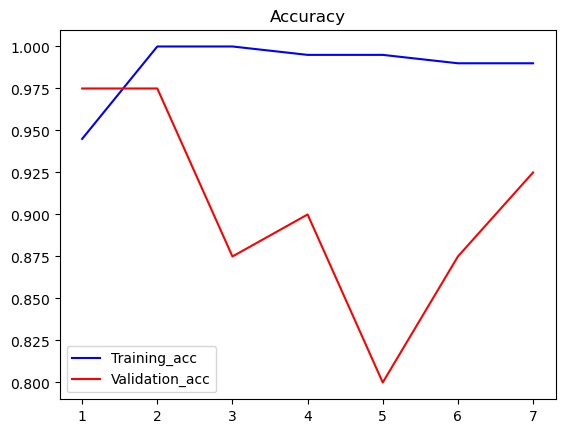

********************************************************************************


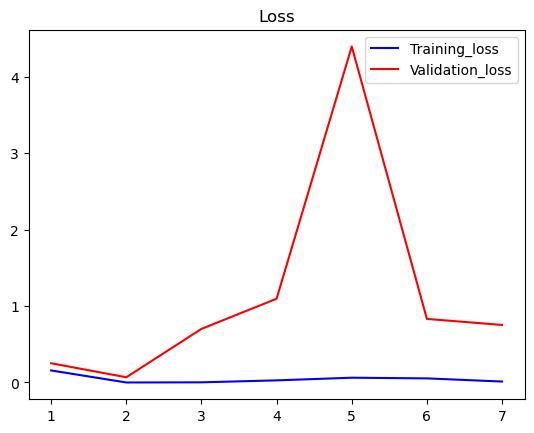

In [54]:
# accuracy 시각화
plt.plot(epochs, train_acc, c='b', label = 'Training_acc')
# 2개의 그래프를 겹치도록 할 것이므로 두번째 그래프를 그려주자.
plt.plot(epochs, val_acc, c='r', label = 'Validation_acc')
plt.title('Accuracy')
plt.legend()
plt.show()

# 결과적으로 증식을 하지 않고 하게 되면 200장가지고는 성능이 나오질 않는다 검증용 데이터가 왔다리갔다리 격차가 매우 크다.

print('*'*80)

# loss 시각화
plt.plot(epochs, train_loss, c='b', label = 'Training_loss')
plt.plot(epochs, val_loss, c='r', label = 'Validation_loss')
plt.title('Loss')
plt.legend()
plt.show()

# 추세가 갑자기 올라가는거보니 과대적합이 발생.